In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px 
from matplotlib.pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from sklearn import metrics
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

In [120]:
df = pd.read_csv(r"C:\Users\nico_\Desktop\Changement climatique\GlobalTemperatures.csv")

Global Land and Ocean-and-Land Temperatures (GlobalTemperatures.csv):

Date: starts in 1750 for average land temperature and 1850 for max and min land temperatures and global ocean and land temperatures

LandAverageTemperature: global average land temperature in celsius

LandAverageTemperatureUncertainty: the 95% confidence interval around the average

LandMaxTemperature: global average maximum land temperature in celsius

LandMaxTemperatureUncertainty: the 95% confidence interval around the maximum land temperature
LandMinTemperature: global average minimum land temperature in celsius

LandMinTemperatureUncertainty: the 95% confidence interval around the minimum land temperature

LandAndOceanAverageTemperature: global average land and ocean temperature in celsius

LandAndOceanAverageTemperatureUncertainty: the 95% confidence interval around the global average land and ocean temperature

In [121]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
df1 = pd.read_csv(r"C:\Users\nico_\Desktop\Changement climatique\GlobalLandTemperaturesByMajorCity.csv")

In [123]:
df1.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [124]:
df_paris = df1[(df1["Country"] == "France") & (df1["City"] == "Paris") ]

In [125]:
df_paris

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
173008,1743-11-01,7.648,1.749,Paris,France,49.03N,2.45E
173009,1743-12-01,NaN,NaN,Paris,France,49.03N,2.45E
173010,1744-01-01,NaN,NaN,Paris,France,49.03N,2.45E
173011,1744-02-01,NaN,NaN,Paris,France,49.03N,2.45E
173012,1744-03-01,NaN,NaN,Paris,France,49.03N,2.45E
...,...,...,...,...,...,...,...
176242,2013-05-01,11.703,0.282,Paris,France,49.03N,2.45E
176243,2013-06-01,16.340,0.271,Paris,France,49.03N,2.45E
176244,2013-07-01,21.186,0.381,Paris,France,49.03N,2.45E
176245,2013-08-01,19.235,0.399,Paris,France,49.03N,2.45E


In [126]:
df_p = df_paris[["dt","AverageTemperature"]]
df_p.head()

,dt,AverageTemperature
173008,1743-11-01,7.648
173009,1743-12-01,NaN
173010,1744-01-01,NaN
173011,1744-02-01,NaN
173012,1744-03-01,NaN


In [127]:
df_p.columns = ["date","temp"]

In [128]:
df_p["date"] = pd.to_datetime(df_p["date"])

In [129]:
df_p.isna().sum()

date     0
temp    73
dtype: int64

In [130]:
df_p.dropna(inplace=True)

In [131]:
df_p.isna().sum()

date    0
temp    0
dtype: int64

In [132]:
df_p.set_index('date',inplace=True)

<Axes: xlabel='date'>

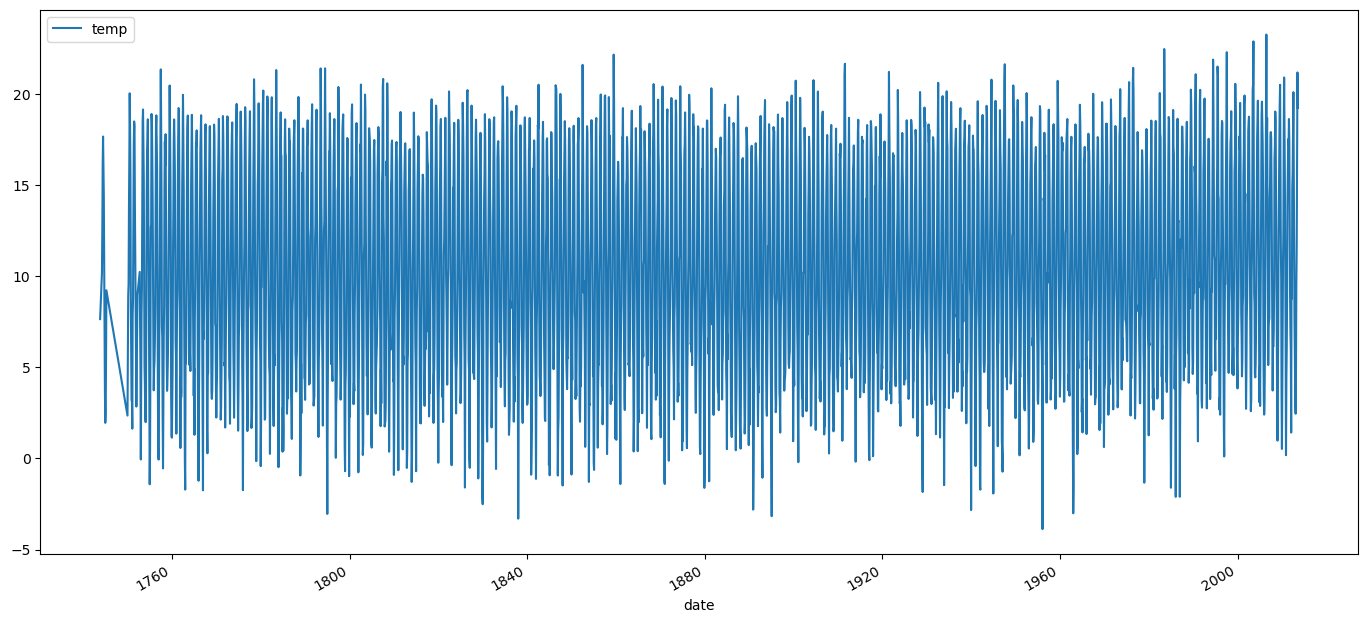

In [133]:
df_p.plot()

In [134]:
df_p.iloc[0]

temp    7.648
Name: 1743-11-01 00:00:00, dtype: float64

In [135]:
df_p.iloc[-1]

temp    19.235
Name: 2013-08-01 00:00:00, dtype: float64

In [136]:
df_annual = df_p.resample('Y').mean()

In [137]:
df_annual.isna().sum()

temp    4
dtype: int64

In [138]:
df_annual.dropna(inplace=True)

In [139]:
df_annual.isna().sum()

temp    0
dtype: int64

In [140]:
df_annual.dtypes

temp    float64
dtype: object

<Axes: xlabel='date'>

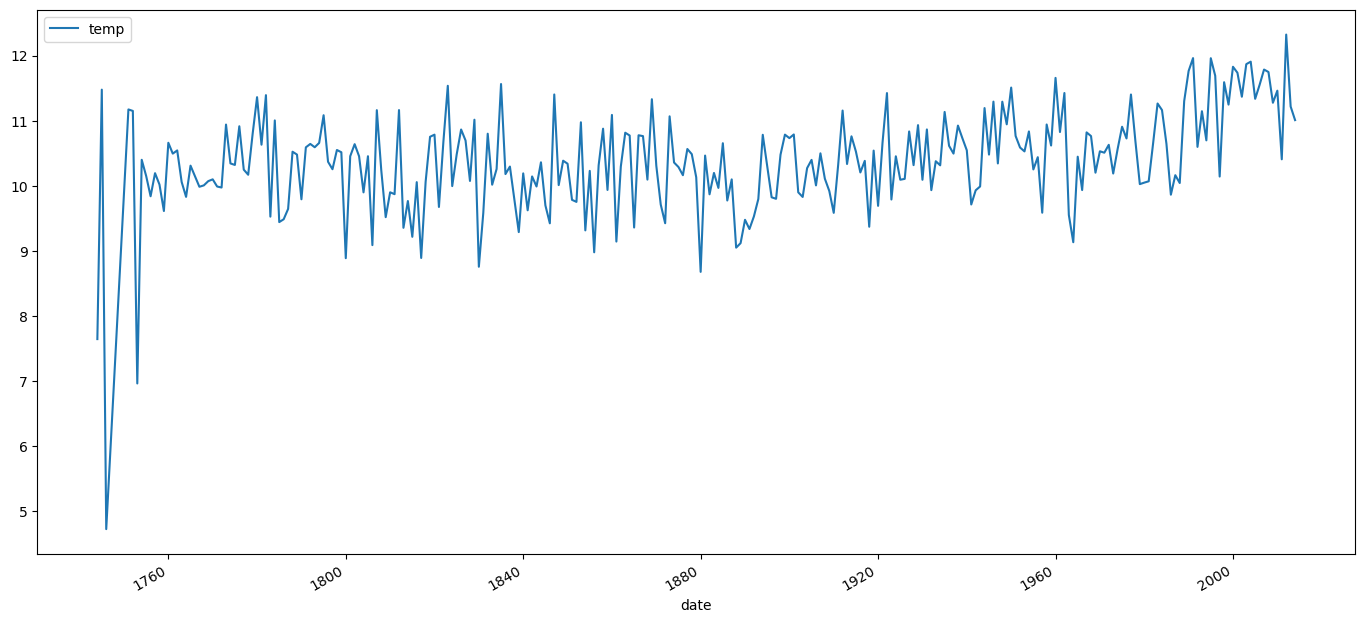

In [141]:
df_annual.plot()

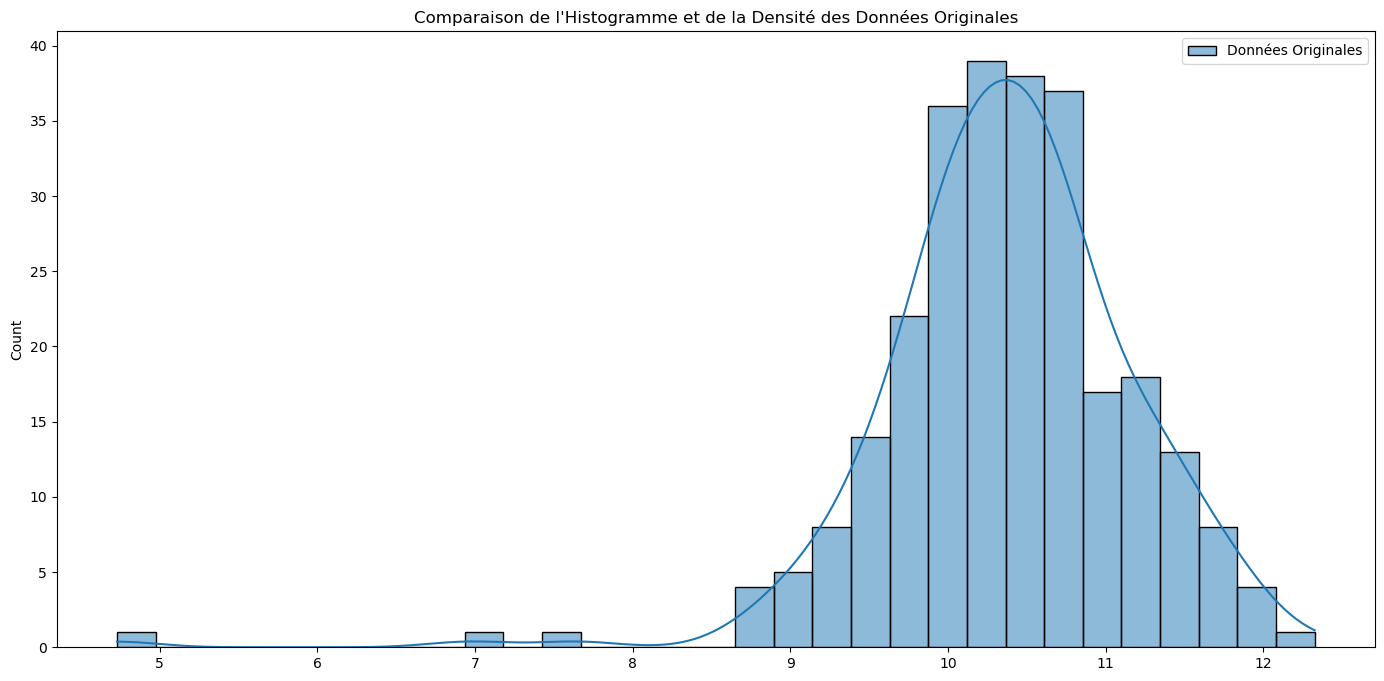

In [595]:
sns.histplot(df_annual, kde=True, color='blue', label='Données Originales')
plt.legend()
plt.title('Comparaison de l\'Histogramme et de la Densité des Données Originales')
plt.show()

Les données ne sont pas normalement distribuées

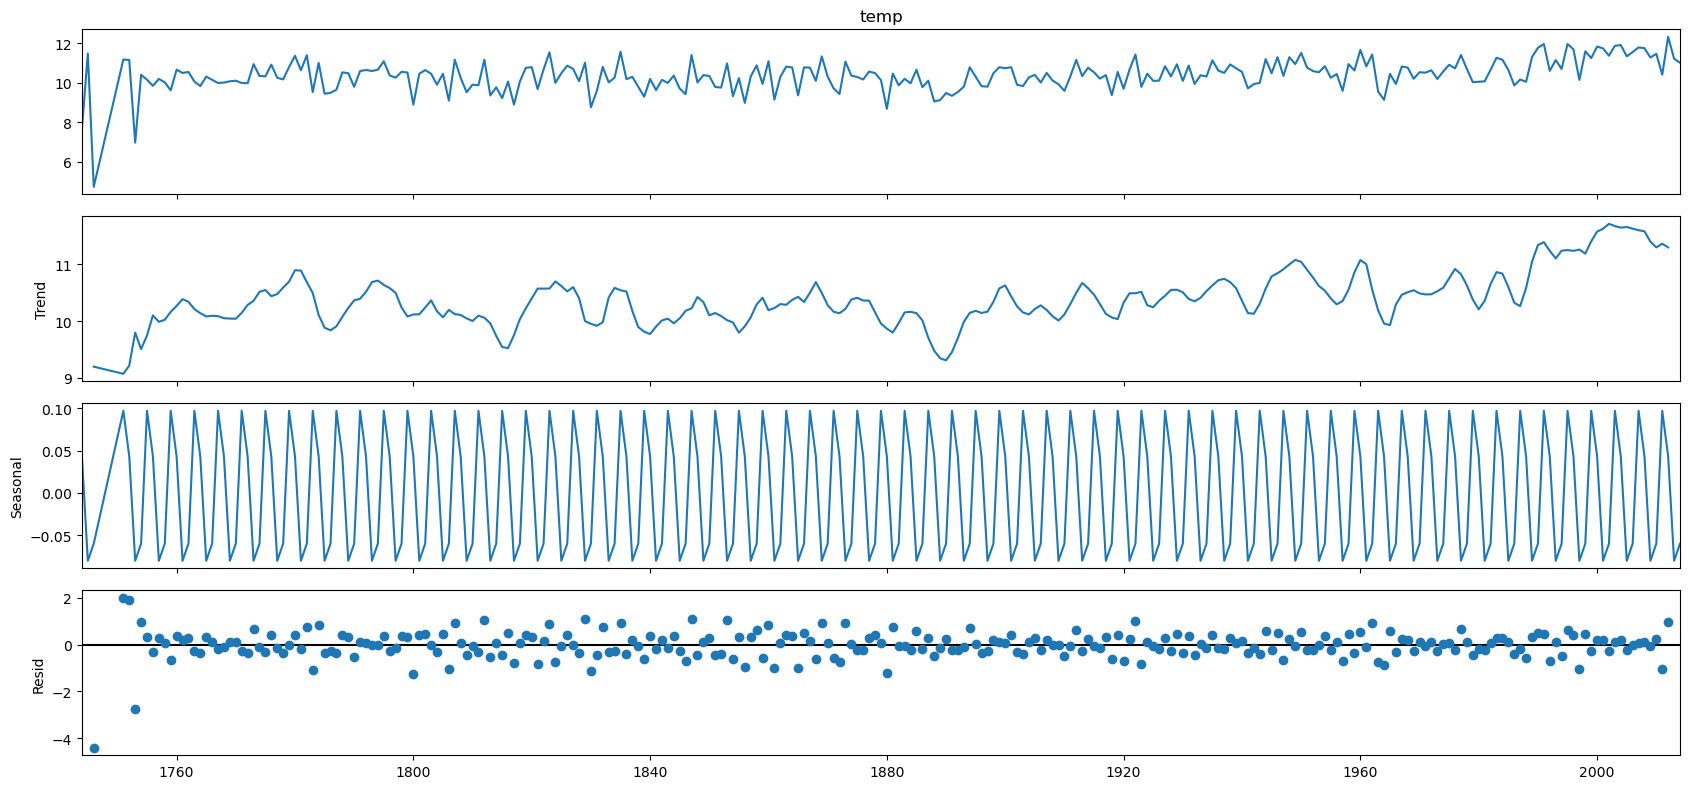

In [596]:
plt.rcParams['figure.figsize'] = (17,8)

decomposition = sm.tsa.seasonal_decompose(df_annual['temp'], model='additive', period=4)
decomposition.plot()
                                          
plt.show()

La tendance est à la hausse.

Il y a une saisonnalité.

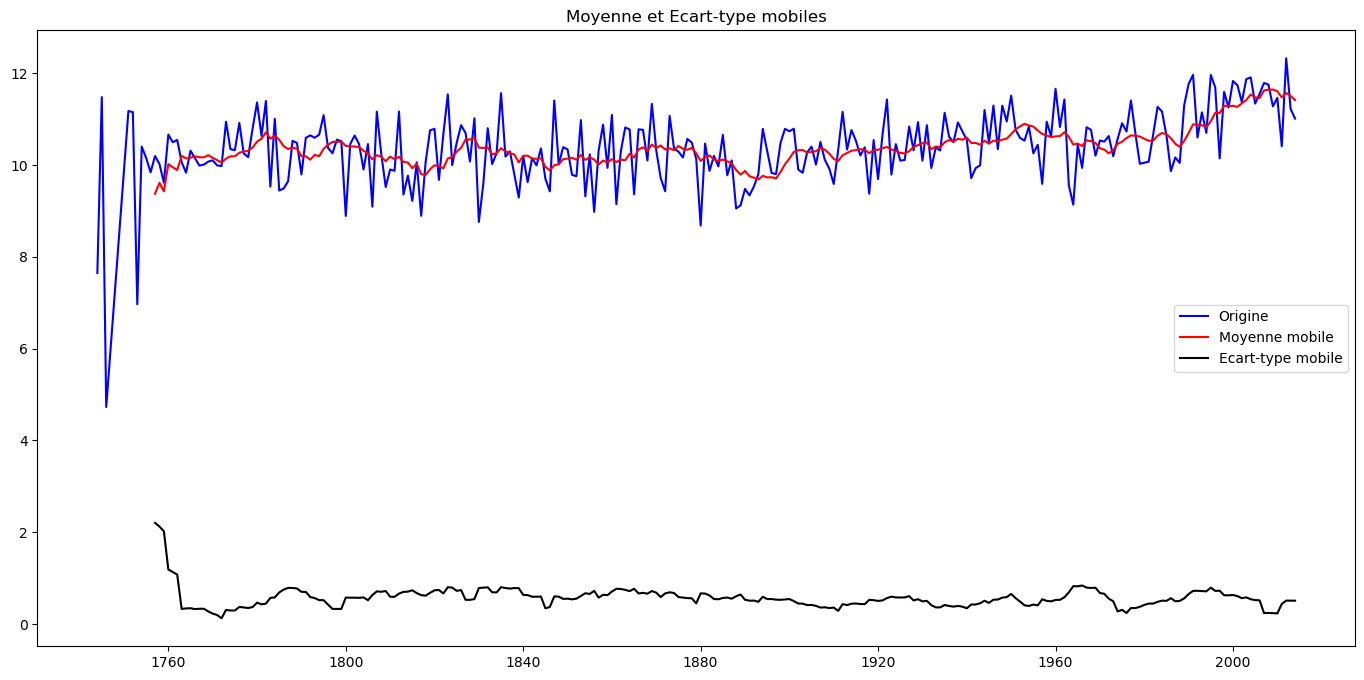

In [597]:
rolling_mean = df_annual.rolling(window = 10).mean()
rolling_std = df_annual.rolling(window = 10).std()
plt.plot(df_annual, color = 'blue', label = 'Origine')
plt.plot(rolling_mean, color = 'red', label = 'Moyenne mobile')
plt.plot(rolling_std, color = 'black', label = 'Ecart-type mobile')
plt.legend(loc = 'best')
plt.title('Moyenne et Ecart-type mobiles')
plt.show()

La moyenne mobile augmente avec le temps. Nous pouvons donc conclure que la série temporelle n’est pas stationnaire.

# Verification de la stationnarité avec le test : ADF( Augmented Dicky Fuller Test)

In [598]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_annual['temp'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: -2.5224338920282863
n_lags: 8
p-value: 0.11011089041517913
Critial Values:
   1%, -3.455952927706342
Critial Values:
   5%, -2.8728086526320302
Critial Values:
   10%, -2.572774990685656


La statistique de test ADF est plus grande que les valeurs critiques pour les seuils de 1%, 5% et 10%. Cela suggère que nous ne pouvons pas rejeter l'hypothèse nulle selon laquelle la série temporelle n'est pas stationnaire.

Le p-value est supérieur à 0.05 (ou tout autre seuil de signification généralement utilisé). Cela signifie que nous ne pouvons pas rejeter l'hypothèse nulle selon laquelle la série temporelle n'est pas stationnaire.

En résumé, les résultats du test ADF suggèrent que la série temporelle annuelle df_annual['temp'] n'est probablement pas stationnaire

# Verification de la stationnarité avec le test : Kwiatkowski-Phillips-Schmidt-Shin (KPSS)

In [599]:
from statsmodels.tsa.stattools import kpss

result = kpss(df_annual["temp"])
print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'num lags: {result[2]}')
print('Critial Values:')
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

KPSS Statistic: 1.4631890186861336
p-value: 0.01
num lags: 8
Critial Values:
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


La statistique de test KPSS est plus grande que les valeurs critiques pour les seuils de 1%, 2.5%, 5% et 10%. Cela suggère que nous pouvons rejeter l'hypothèse nulle et concluons que la série temporelle n'est pas stationnaire.

Le p-value est inférieure à 0.05. Cela signifie que nous ne pouvons rejeter l'hypothèse nulle selon laquelle la série temporelle est stationnaire.

En résumé, les résultats du test ADF suggèrent que la série temporelle annuelle df_annual['temp'] n'est probablement pas stationnaire.

# Transformation de la série non stationnaire en une série avec des données normalisées avec le Boxcox et stationnaire à l'aide de la différenciation

Le Boxcox facilite le processus de modélisation et ce qui conduit à de meilleures performances des modèles

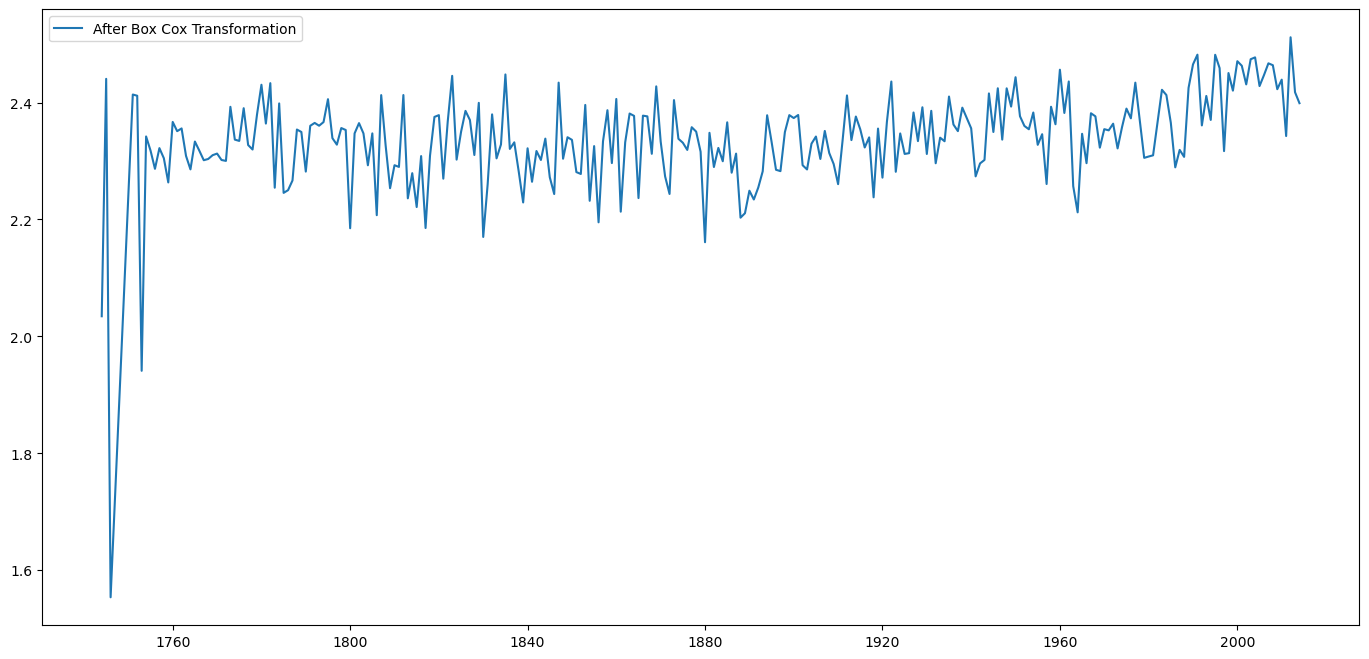

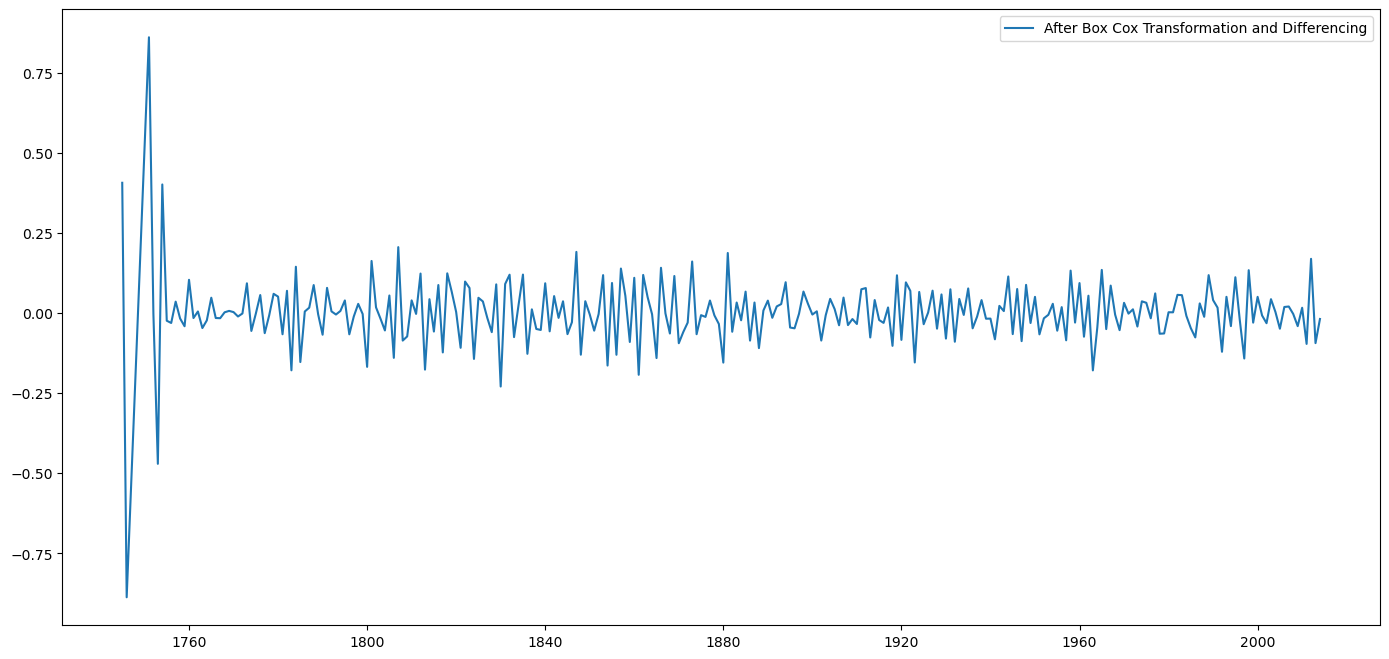

In [600]:
from scipy.stats import boxcox

# stabilisation de la variance des données pour les rendre plus normalement distribuées
temp_stat=pd.Series(boxcox(df_annual['temp'],lmbda=0),index=df_annual.index) # lmbda=0:transformation standard Box-Cox
plt.plot(temp_stat, label="After Box Cox Transformation")
plt.legend(loc='best')
plt.show()

# Différenciation des données transformées
temp_stat_diff= pd.Series(temp_stat-temp_stat.shift(), index=temp_stat.index)
temp_stat_diff.dropna(inplace=True)
plt.plot(temp_stat_diff, label="After Box Cox Transformation and Differencing")
plt.legend()
plt.show()

In [601]:
result = adfuller(temp_stat_diff, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -9.82978701792962
n_lags: 7
p-value: 5.073269167251645e-17
Critial Values:
   1%, -3.455952927706342
Critial Values:
   5%, -2.8728086526320302
Critial Values:
   10%, -2.572774990685656


La statistique ADF est -9.82978701792962. Cette valeur est inférieure aux seuils critiques à 1%, 5% et 10%, ce qui indique une forte certitude pour rejeter l'hypothèse nulle. Cela suggère que votre série temporelle est stationnaire.

Le nombre de retards utilisés dans le test est 7, comme indiqué par n_lags: 7. Cela indique le nombre de retards utilisés dans le modèle de régression pour évaluer la stationnarité.

Le p-value est très faible, 5.073269167251645e-17, ce qui est bien en dessous de 0.05 (niveau de signification communément utilisé), indiquant un rejet fort de l'hypothèse nulle. Cela renforce la conclusion que la série temporelle est stationnaire.

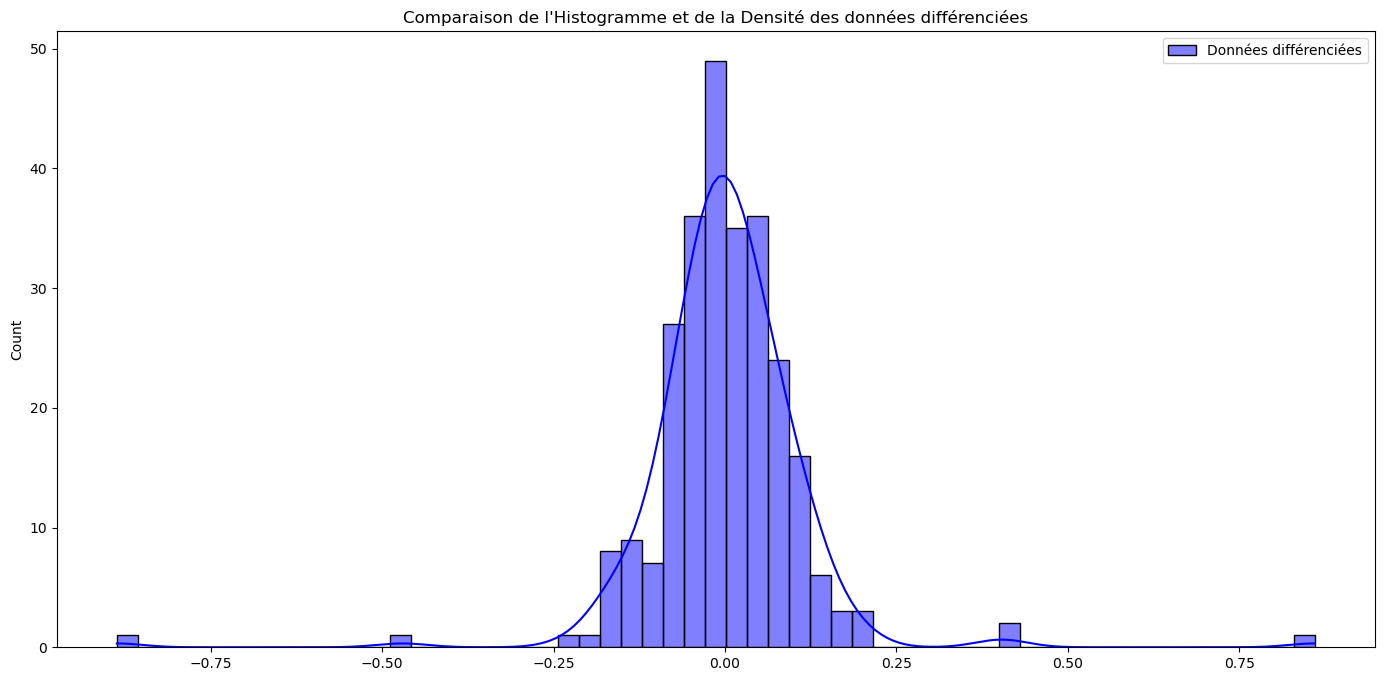

In [602]:
sns.histplot(temp_stat_diff, kde=True, color='blue', label='Données différenciées')
plt.legend()
plt.title('Comparaison de l\'Histogramme et de la Densité des données différenciées')
plt.show()

# Mesure de l'ACF et du PACF

L'ACF mesure la corrélation entre une observation et ses observations retardées à tous les retards.
 
Le PACF mesure la corrélation entre une observation et ses observations retardées, en tenant compte des contributions des observations intermédiaires.

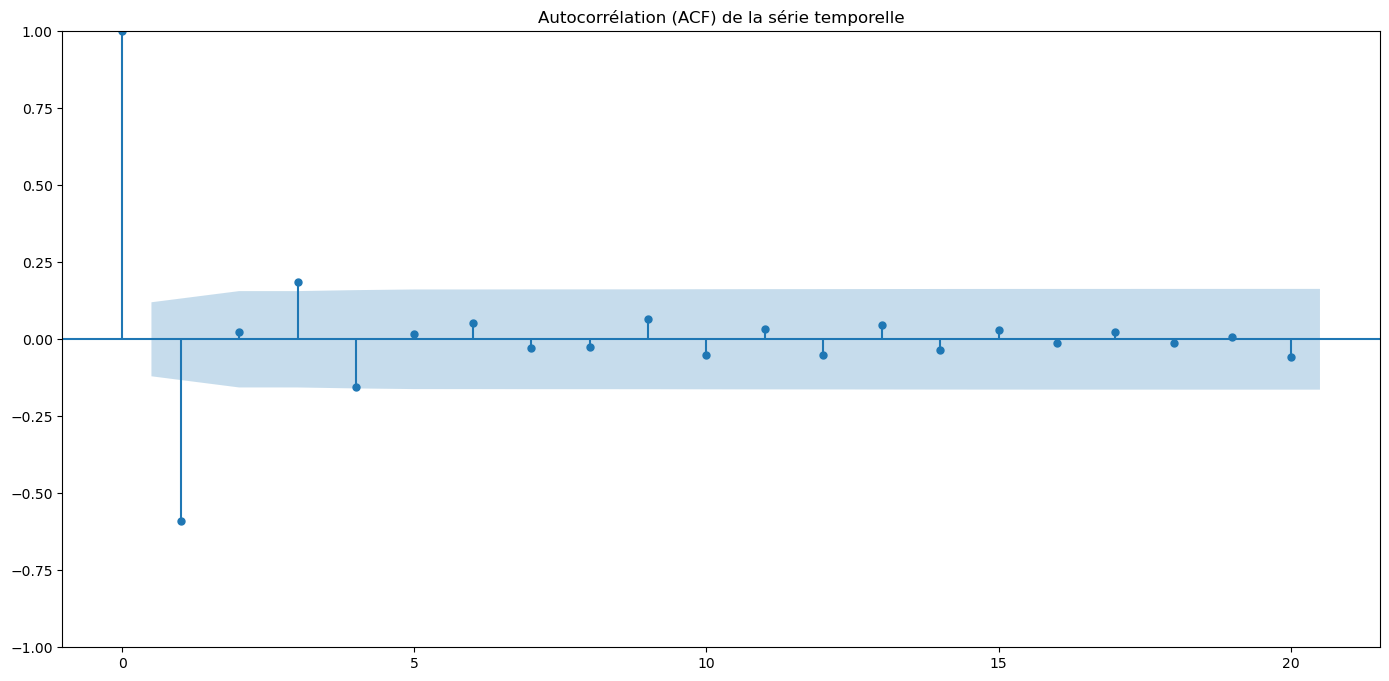

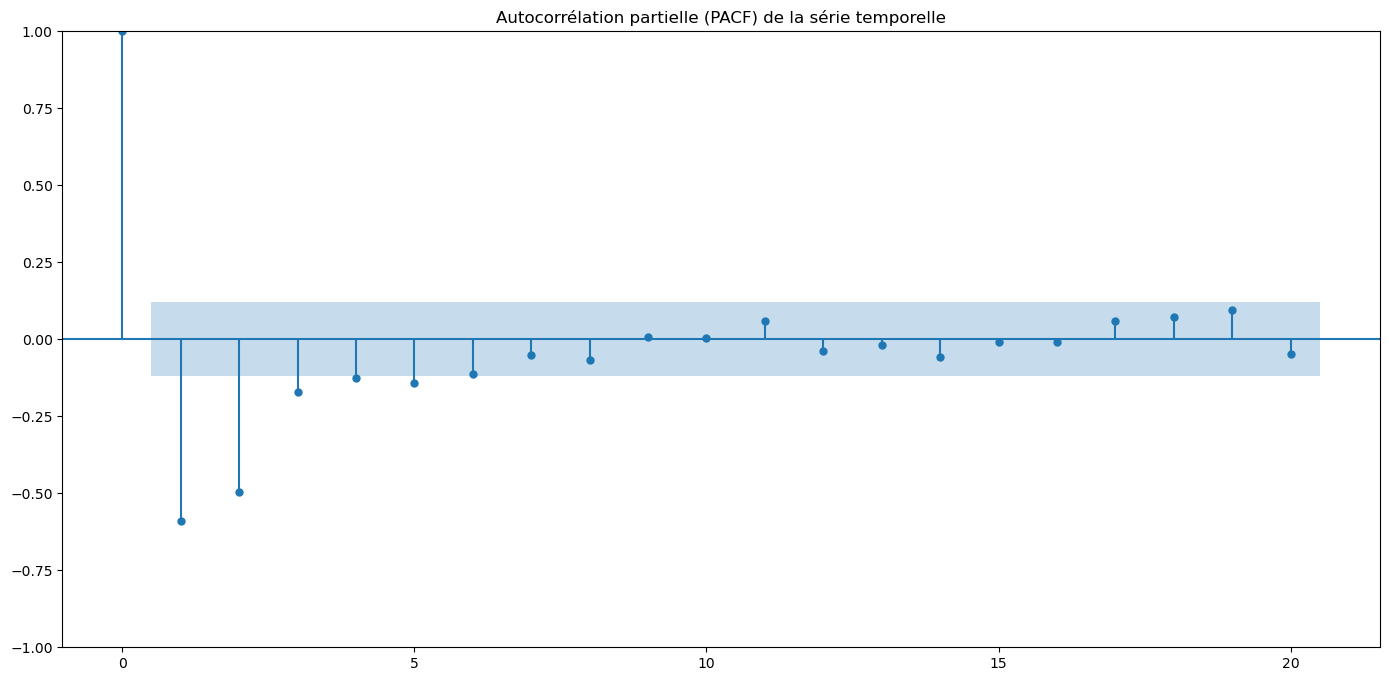

In [603]:
# Calcul de l'ACF et du PACF de la série temporelle 
acf = sm.tsa.acf(temp_stat_diff, nlags=20)
pacf = sm.tsa.pacf(temp_stat_diff, nlags=20)

# Tracer l'ACF
plot_acf(temp_stat_diff, lags=20)
plt.title("Autocorrélation (ACF) de la série temporelle")
plt.show()

# Tracer le PACF
plot_pacf(temp_stat_diff, lags=20)
plt.title("Autocorrélation partielle (PACF) de la série temporelle")
plt.show()

Pour l'ACF (fonction d'autocorrélation), nous observons des corrélations positives et négatives. 2 valeurs sont en dehors du seuil de signification, ce qui suggère qu'il y a des retards significatifs dans les données qui peuvent être capturés par le terme MA (Moving Average) du modèle ARIMA.
Les 2 retards dans l'ACF signifient qu'il y a une corrélation significative entre les températures d'une année donnée et les températures des années précédentes.

Pour le PACF (fonction d'autocorrélation partielle), 5 valeurs sont en dehors du seuil de signification, ce qui suggère qu'il y a des retards significatifs dans les données qui peuvent être capturés par le terme RA (auto-régression) du modèle ARIMA.
Les températures des années précédentes ont une influence importante sur les températures de l'année actuelle, en tenant compte des contributions des années intermédiaires.

# Modèle ARIMA

Dép. Variable (Variable dépendante) : Il s'agit de la variable que vous essayez de modéliser, dans ce cas, la température.

No. Observations (Nombre d'observations) : C'est le nombre total d'observations dans votre ensemble de données.

Modèle : C'est le type de modèle spécifié.

Log Likelihood (Vraisemblance logarithmique) : C'est une mesure de l'ajustement du modèle aux données. Plus la valeur est élevée, meilleur est l'ajustement.

AIC (Critère d'information d'Akaike) : C'est un critère de sélection de modèle. Il prend en compte à la fois l'ajustement du modèle et sa complexité. Un AIC plus faible indique un meilleur modèle.

BIC (Critère d'information bayésien) : C'est un autre critère de sélection de modèle similaire à l'AIC, mais qui pénalise davantage les modèles plus complexes.

Coef (Coefficients) : Ce sont les coefficients estimés pour chaque terme dans le modèle ARIMA. Ils représentent l'effet de chaque terme sur la variable dépendante.

P>|z| (P-value) : C'est la valeur p associée à chaque coefficient. Elle indique si le coefficient est statistiquement significatif ou non. Plus la valeur p est faible, plus le coefficient est significatif.

sigma2 (Variance résiduelle) : C'est la variance des résidus du modèle. Elle mesure l'erreur de prédiction du modèle.

Ljung-Box (Q) : Il s'agit d'un test de blancheur des résidus. Un Q plus faible et une valeur p plus élevée indiquent un meilleur ajustement du modèle.

Jarque-Bera (JB) : Il s'agit d'un test d'asymétrie et d'aplatissement des résidus. Un JB plus élevé et une valeur p plus faible indiquent un plus grand écart par rapport à une distribution normale.

Heteroskedasticity (H) : C'est un test d'hétéroscédasticité des résidus. Une valeur p faible indique une violation de l'hypothèse d'homoscédasticité.

In [606]:
p = 5
d = 1 # 1 car 1 différenciation
q = 2

model = ARIMA(temp_stat_diff.values, order=(p,d,q))
fit_model = model.fit()

print(fit_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  266
Model:                 ARIMA(5, 1, 2)   Log Likelihood                 292.401
Date:                Thu, 11 Apr 2024   AIC                           -568.802
Time:                        23:18:41   BIC                           -540.164
Sample:                             0   HQIC                          -557.295
                                - 266                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9545      0.083    -23.643      0.000      -2.117      -1.792
ar.L2         -1.6866      0.145    -11.623      0.000      -1.971      -1.402
ar.L3         -0.9736      0.184     -5.278      0.0

Les coefficients ar.L1, ar.L2, ar.L3, ar.L4, ar.L5 et ma.L2 sont significatifs avec une p-value < 0.05. Nous allons donc changer l'ordre.

In [629]:
p = 5
d = 1 
q = 1

model = ARIMA(temp_stat_diff.values, order=(p,d,q))
fit_model = model.fit()

print(fit_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  266
Model:                 ARIMA(5, 1, 1)   Log Likelihood                 297.250
Date:                Thu, 11 Apr 2024   AIC                           -580.500
Time:                        23:36:29   BIC                           -555.442
Sample:                             0   HQIC                          -570.432
                                - 266                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0070      0.054    -18.748      0.000      -1.112      -0.902
ar.L2         -0.7833      0.091     -8.585      0.000      -0.962      -0.605
ar.L3         -0.3730      0.114     -3.261      0.0

Tous les coefficients sont significatifs avec des p-values < 0.05

# Résiduels

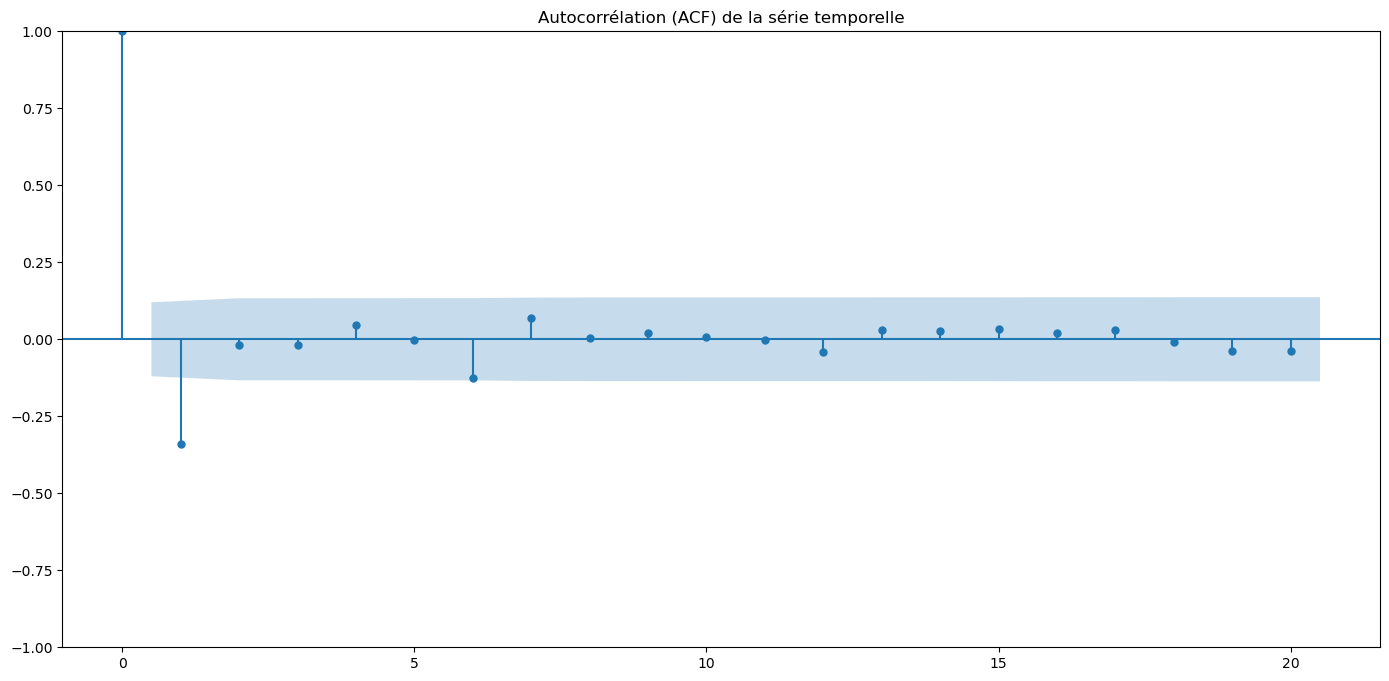

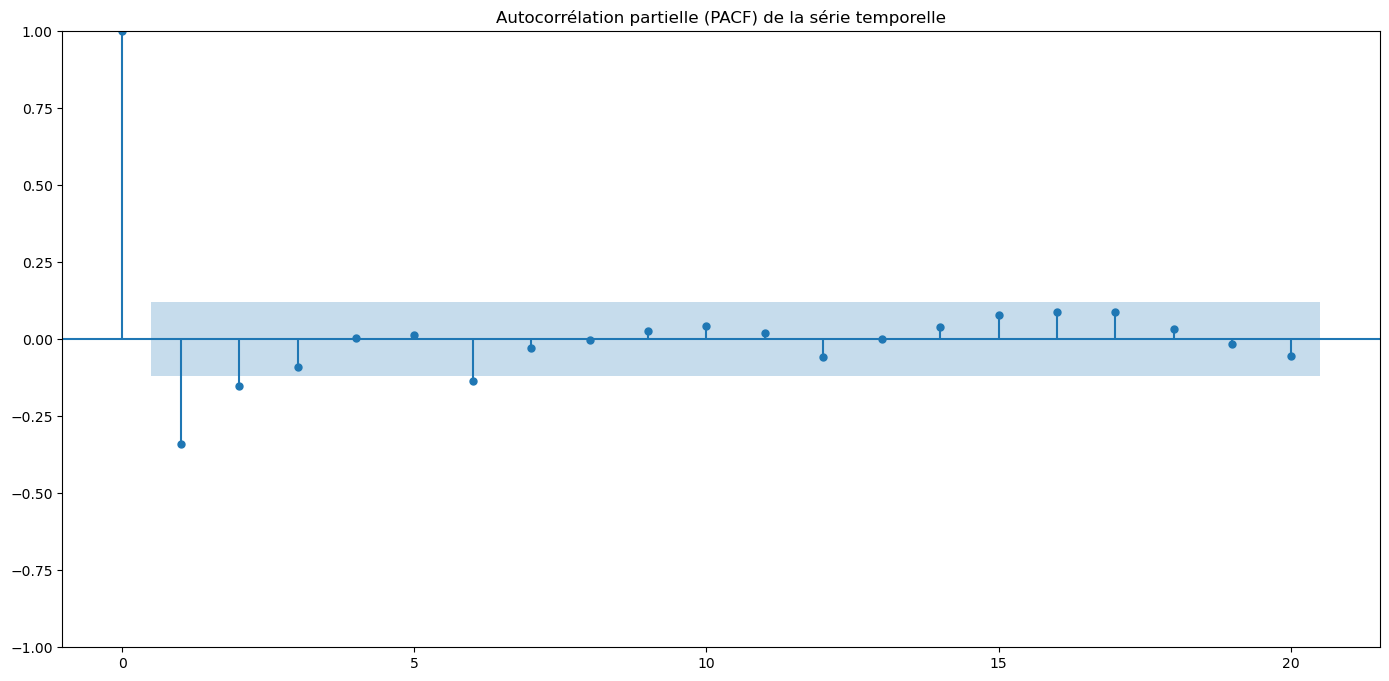

In [627]:
residual = fit_model.resid

# Tracer l'ACF
plot_acf(residual, lags=20)
plt.title("Autocorrélation (ACF) de la série temporelle")
plt.show()

# Tracer le PACF
plot_pacf(residual, lags=20)
plt.title("Autocorrélation partielle (PACF) de la série temporelle")
plt.show()

Tous les points sont pratiquement à l'intérieur des bornes

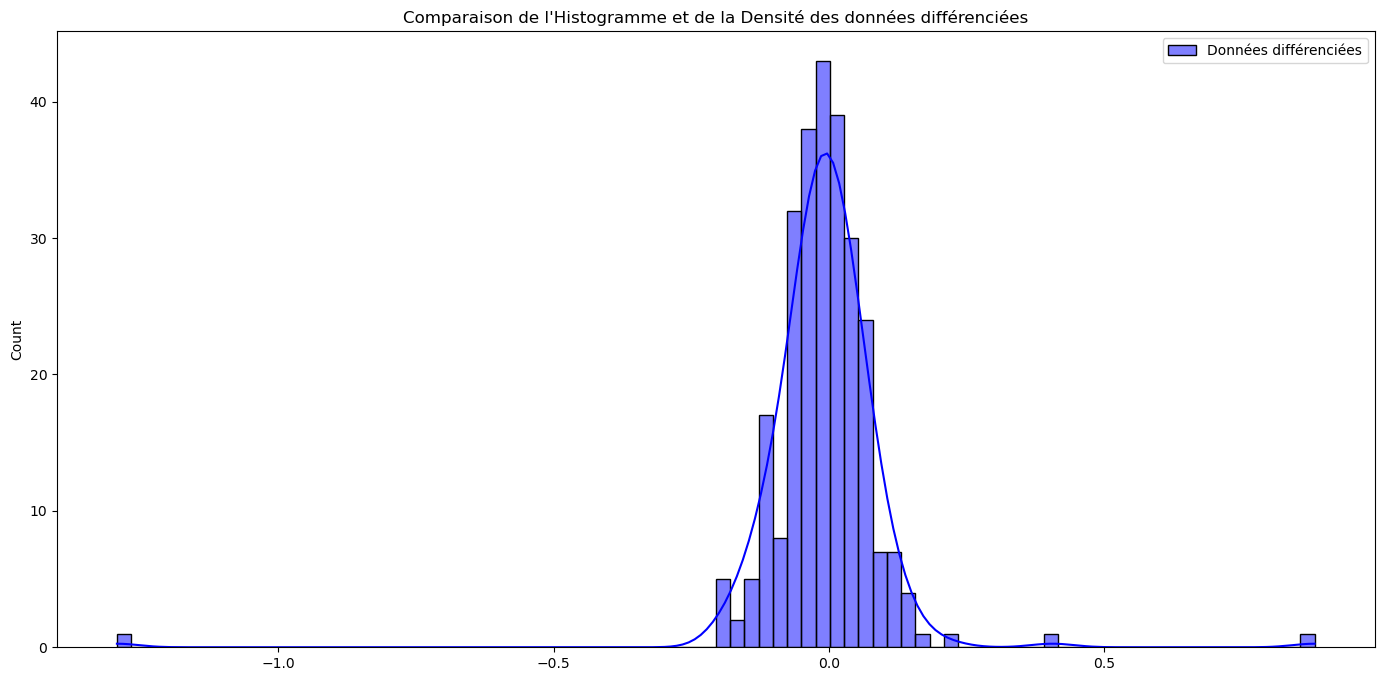

In [630]:
sns.histplot(residual, kde=True, color='blue', label='Données différenciées')
plt.legend()
plt.title('Comparaison de l\'Histogramme et de la Densité des données différenciées')
plt.show()

In [646]:
forecast_diff = fit_model.forecast(steps=10)

In [647]:
forecast_diff

array([ 0.06429026, -0.04802412,  0.00185136,  0.04547711, -0.04368786,
        0.01345597,  0.018864  , -0.02584656,  0.01502075,  0.00802282])

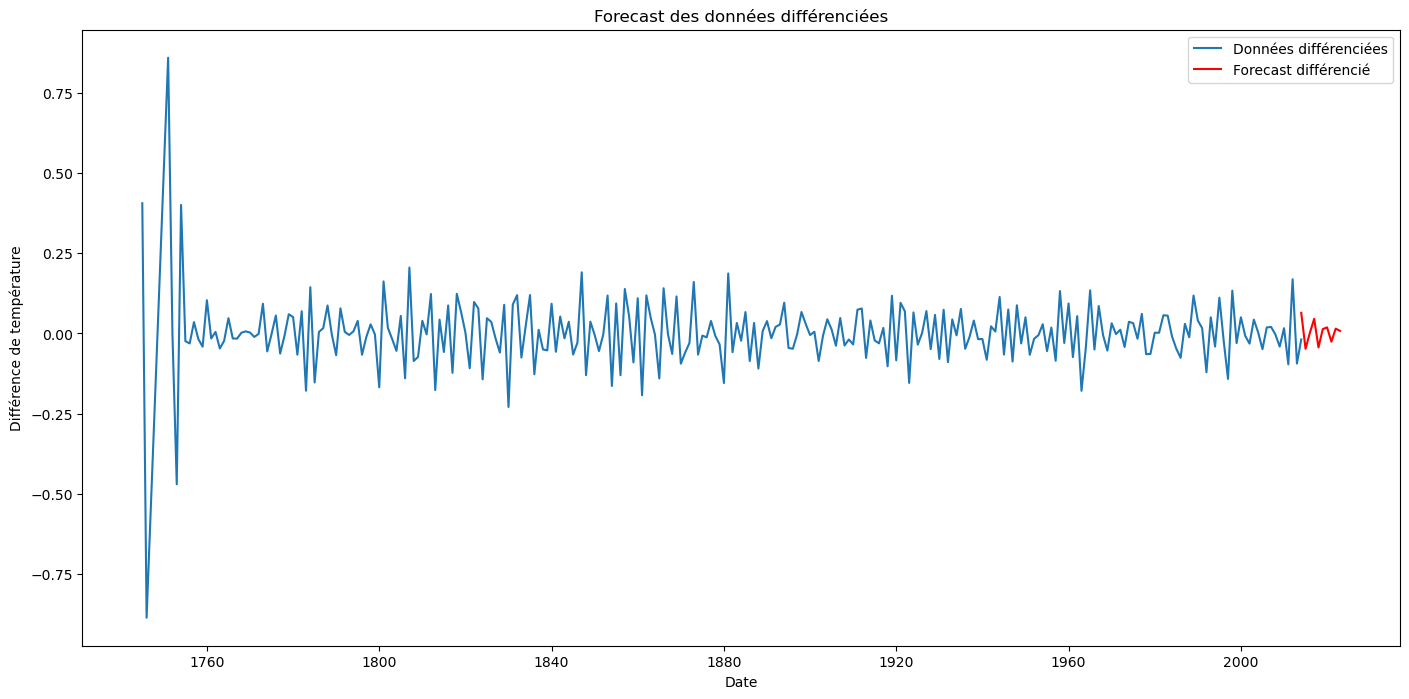

In [648]:
forecast_index = pd.date_range(start=temp_stat_diff.index[-1], periods=10, freq='Y')

plt.plot(temp_stat_diff.index, temp_stat_diff, label='Données différenciées')
plt.plot(forecast_index, forecast_diff, label='Forecast différencié', color='red')
plt.xlabel('Date')
plt.ylabel('Différence de température')
plt.title('Forecast des données différenciées')
plt.legend()
plt.show()

# Inversement de la différenciation et du boxcox

In [653]:
forecast_original = forecast_diff + temp_stat.shift(1).iloc[-1]

In [652]:
forecast_diff

array([ 0.06429026, -0.04802412,  0.00185136,  0.04547711, -0.04368786,
        0.01345597,  0.018864  , -0.02584656,  0.01502075,  0.00802282])

In [654]:
forecast_original

array([2.48198073, 2.36966636, 2.41954183, 2.46316759, 2.37400261,
       2.43114644, 2.43655448, 2.39184392, 2.43271123, 2.42571329])

In [657]:
forecast_original = np.exp(forecast_original)
forecast_original

array([11.96494031, 10.69382375, 11.24070797, 11.74194634, 10.74029558,
       11.37191187, 11.43357814, 10.93363608, 11.38972037, 11.31029407])

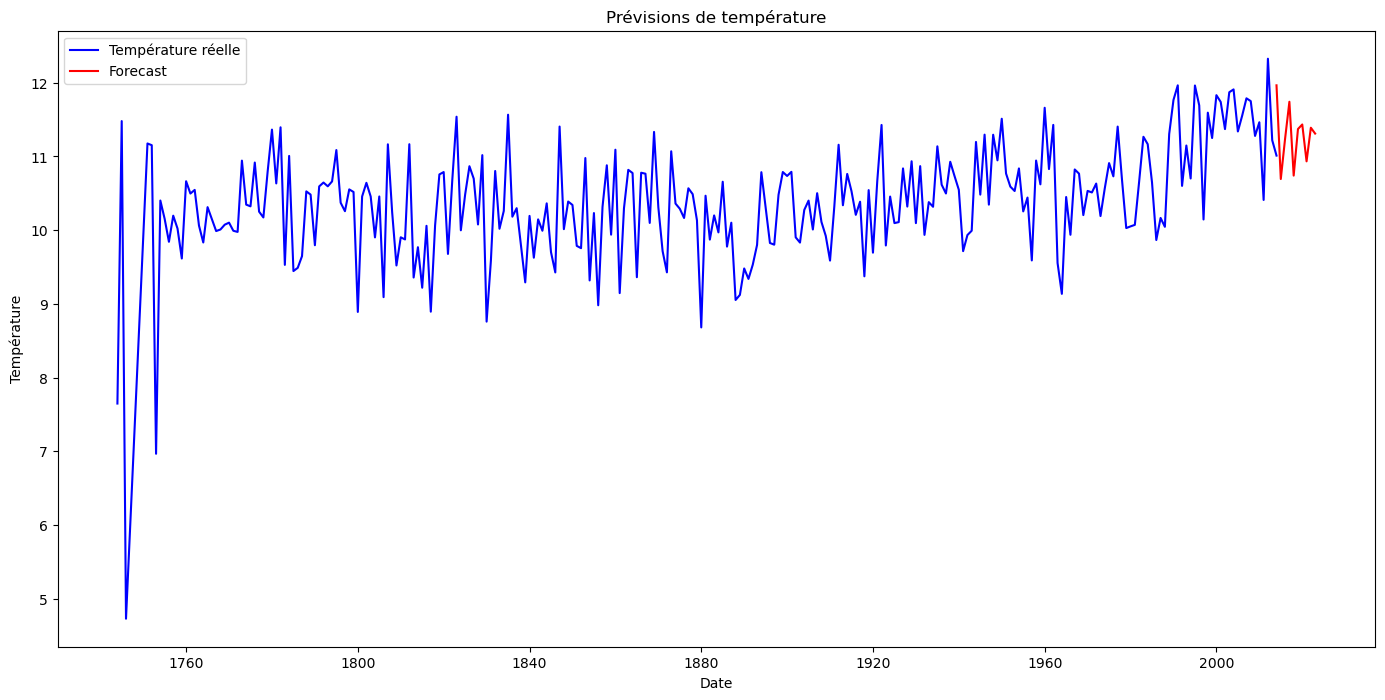

In [661]:
plt.plot(df_annual.index, df_annual, label='Température réelle', color='blue')

plt.plot(pd.date_range(start=df_annual.index[-1], periods=10, freq='Y'), forecast_original, label="Forecast", color="red")

plt.xlabel('Date')
plt.ylabel('Température')
plt.title('Prévisions de température')
plt.legend()
plt.show()
